In [133]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, mean_squared_error
%matplotlib inline

In [134]:
df = pd.read_csv("C:/Users/victus/Documents/Presentation_project/New_project/Obesity.csv")

In [135]:
df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

In [136]:
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [138]:
df.shape

(108, 7)

In [139]:
df.head(20)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


In [140]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [141]:
df.nunique()

ID        108
Age        75
Gender      2
Height     10
Weight     23
BMI        25
Label       4
dtype: int64

Ağırlık ve BMI arasında yüksek bir korelasyon var.

In [146]:
df = pd.DataFrame(df)

# Histogram çizimi
fig = px.histogram(data_frame=df, x='Age', color='Gender', facet_col='Gender',
                   title='Age Distribution', color_discrete_sequence=['blue', 'pink'])

fig.show()

Erkek ve Kadın arasındaki yaş oranı benzerlik göstermektedir.
Çoğunlukla 10 ila 60 yaş arası insanlar var.

In [92]:
fig=px.sunburst(df,path=['Gender','Label'],values=df.value_counts().values,color_discrete_sequence=['pink','blue'])
fig.show()

Cinsiyet dağılımı bakıldığında eşit gözükmektedir.
Kadınların yarısından fazlası zayıftır ve Kadınlar grubunda Obez bulunmamaktadır.

In [150]:
df = pd.DataFrame(df)

# Age için histogram çizimi
fig_age = px.histogram(data_frame=df, x='Age', color='Gender', facet_col='Gender',
                       title='Age Distribution', color_discrete_sequence=['blue', 'pink'])
fig_age.update_layout(showlegend=False)  # Legend'i gizle

# Label için histogram çizimi
fig_label = px.histogram(data_frame=df, x='Label', color='Label', title='Label Distribution',
                         color_discrete_sequence=['blue', 'pink'])

fig_age.show()
fig_label.show()

In [152]:
df = pd.DataFrame(df)

# Weight ve Label için histogram çizimi
fig = px.histogram(data_frame=df, x='Weight', color='Label', facet_col='Label',
                   title='Weight Distribution by Label', color_discrete_sequence=['green', 'yellow'])

fig.show()

In [154]:
df = pd.DataFrame(df)

# Distplot çizimi
fig = ff.create_distplot([df[df['Gender']=='Male']['BMI'], df[df['Gender']=='Female']['BMI']],
                         group_labels=['Male', 'Female'], colors=['blue', 'pink'], show_hist=False)

fig.update_layout(title_text='BMI Distribution by Gender')

fig.show()

Kadınların BMI'sı Erkeklerinkinden daha düşüktür.

In [156]:
df2=df.drop('ID',axis=1)
df2=pd.get_dummies(df2)
df2.head(10)

,Age,Height,Weight,BMI,Gender_Female,Gender_Male,Label_Normal Weight,Label_Obese,Label_Overweight,Label_Underweight
0,25,175,80,25.3,0,1,1,0,0,0
1,30,160,60,22.5,1,0,1,0,0,0
2,35,180,90,27.3,0,1,0,0,1,0
3,40,150,50,20.0,1,0,0,0,0,1
4,45,190,100,31.2,0,1,0,1,0,0
5,50,140,40,16.7,1,0,0,0,0,1
6,55,200,110,34.2,0,1,0,1,0,0
7,60,130,30,13.3,1,0,0,0,0,1
8,65,210,120,37.2,0,1,0,1,0,0
9,70,120,20,10.0,1,0,0,0,0,1


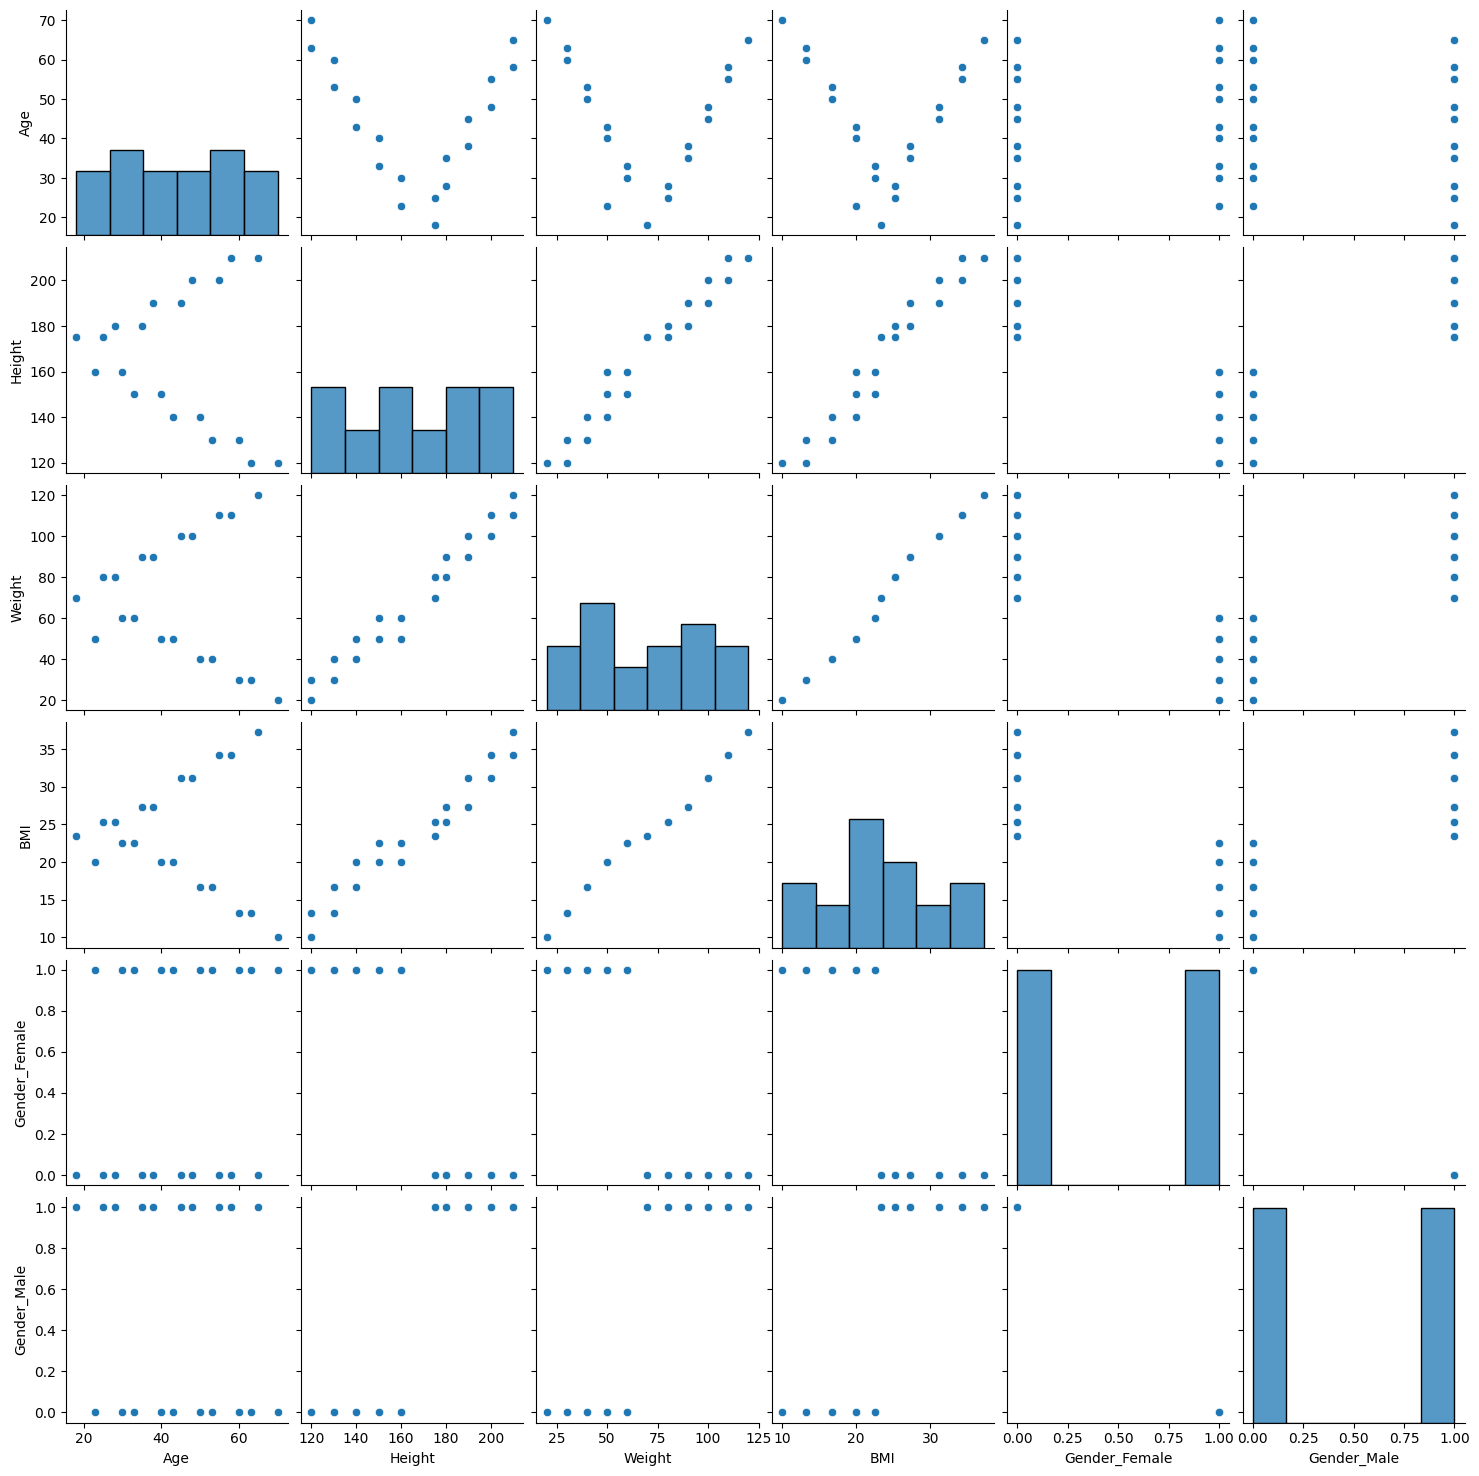

In [160]:
df = pd.DataFrame(df)

# Select relevant columns for pairplot
columns_for_pairplot = ['Age', 'Height', 'Weight', 'BMI', 'Gender_Female', 'Gender_Male']

# Create a pairplot
sns.pairplot(df[columns_for_pairplot])
plt.show()

C:\Users\victus\AppData\Local\Temp\ipykernel_3580\2289309333.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



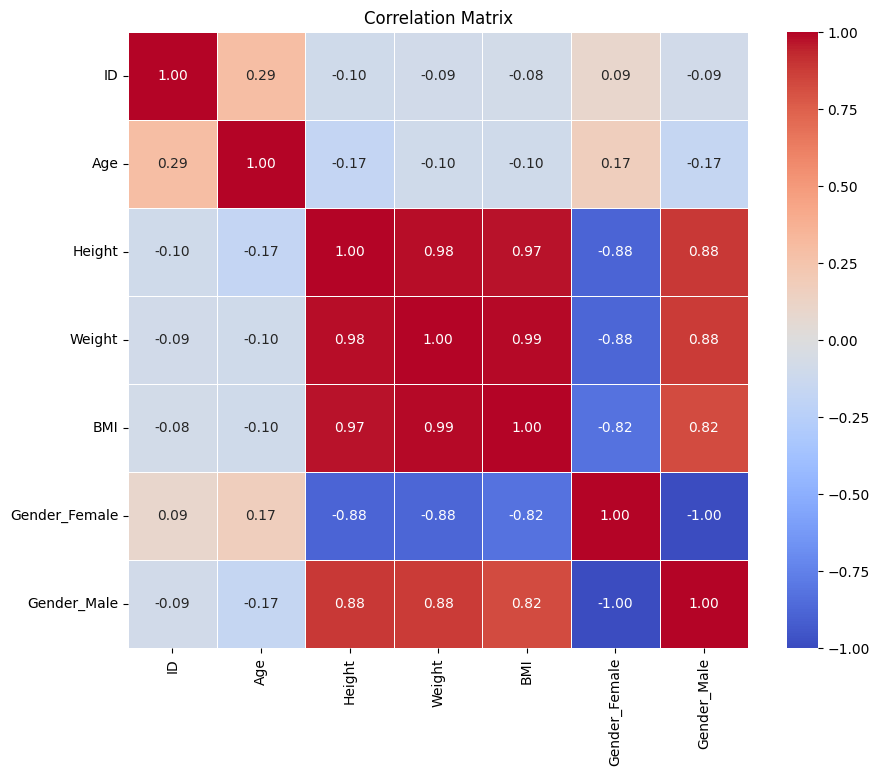

In [157]:
df = pd.DataFrame(data)

# Create the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

0,97'lik korelasyon katsayısı, BMI ile Ağırlık arasında güçlü bir pozitif korelasyon olduğunu göstermektedir.
Cinsiyet_Erkek ve Boy da oldukça ilişkilidir.
Label_Obese ve BMI'nin Yaş, Boy ve Kilo ile de ilişkili olduğu görülmektedir.
Gender_Female, Label_Underweight dışındaki diğer etiketlerle negatif ilişkilidir.

In [ ]:
df = pd.DataFrame(df)

# 'Gender' sütununu one-hot encoding kullanarak numerik formata çevirme
df = pd.get_dummies(df, columns=['Gender'])

print(df)